# <center>Pneumonia Detection on Chest X-Ray Images</center>

<center><img src="https://images.unsplash.com/photo-1555708982-8645ec9ce3cc?ixlib=rb-1.2.1&ixid=MnwxMjA3fDB8MHxwaG90by1wYWdlfHx8fGVufDB8fHx8&auto=format&fit=crop&w=1031&q=80"></center>

# **Importing Libraries**

In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten
from tensorflow.keras.metrics import BinaryAccuracy, Precision, Recall


import warnings
warnings.filterwarnings("ignore")
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3' 

# **Loading Data**

In [19]:
train = keras.utils.image_dataset_from_directory("../input/chest-xray-pneumonia/chest_xray/train/")
test = keras.utils.image_dataset_from_directory("../input/chest-xray-pneumonia//chest_xray/test")
val = keras.utils.image_dataset_from_directory("../input/chest-xray-pneumonia/chest_xray/val")

Found 5216 files belonging to 2 classes.
Found 624 files belonging to 2 classes.
Found 16 files belonging to 2 classes.


In [20]:
batch = train.as_numpy_iterator().next()

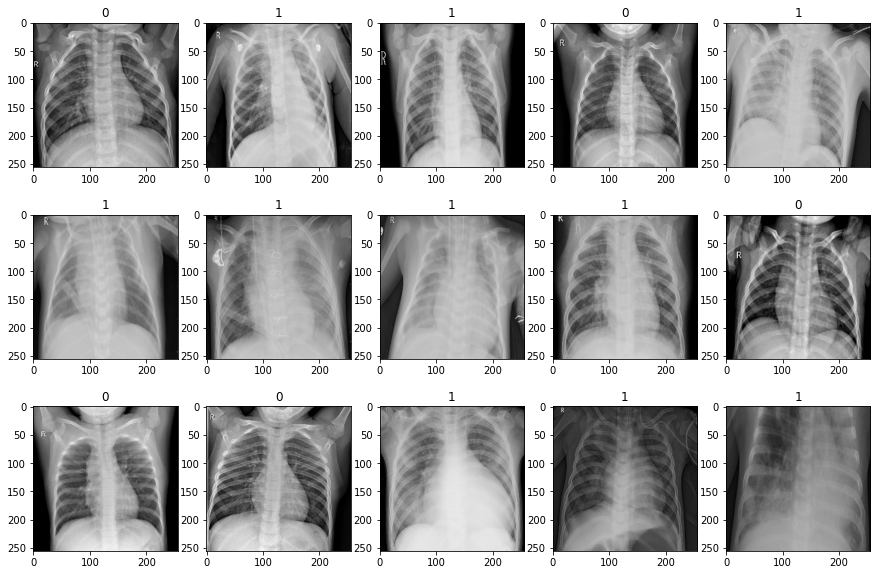

In [21]:
fig, ax = plt.subplots(3, 5, figsize=(15,10))
ax = ax.flatten()
for idx, img in enumerate(batch[0][:15]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

# Preprocessing

## Scaling

In [22]:
train = train.map(lambda x, y:(x/255, y))
test = test.map(lambda x, y:(x/255, y))
val = val.map(lambda x, y:(x/255, y))

In [23]:
batch = train.as_numpy_iterator().next()

In [24]:
batch[0].min()

0.0

In [25]:
batch[0].max()

1.0

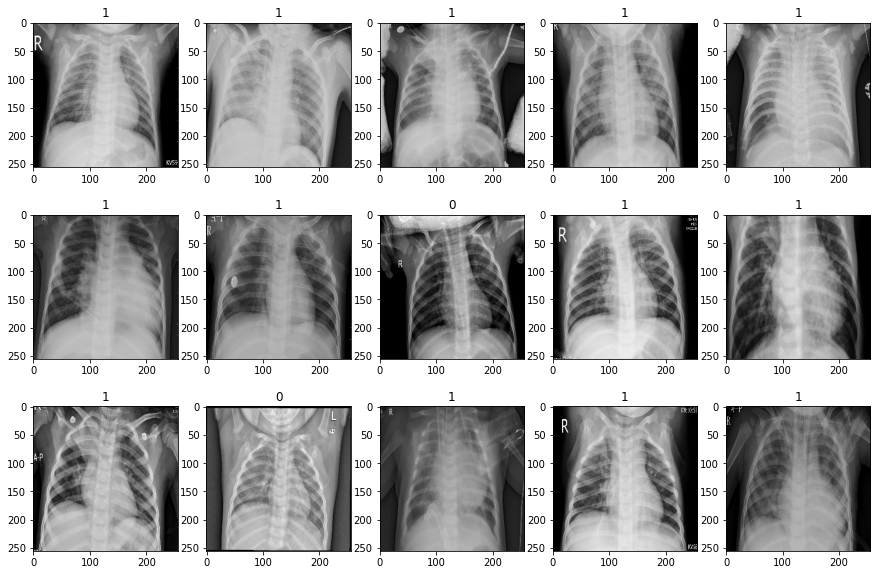

In [26]:
fig, ax = plt.subplots(3, 5, figsize=(15,10))
ax = ax.flatten()
for idx, img in enumerate(batch[0][:15]):
    ax[idx].imshow(img)
    ax[idx].title.set_text(batch[1][idx])

# Building Model

In [28]:
model = Sequential()

model.add(Conv2D(16,(3,3),1, activation="relu", input_shape=(256,256,3)))
model.add(MaxPooling2D())
model.add(Conv2D(16,(3,3),1, activation="relu", input_shape=(256,256,3)))
model.add(MaxPooling2D())
model.add(Conv2D(16,(3,3),1, activation="relu", input_shape=(256,256,3)))
model.add(MaxPooling2D())

model.add(Flatten())

model.add(Dense(256, activation="relu"))
model.add(Dense(1, activation="sigmoid"))

In [29]:
model.compile("adam", loss=tf.losses.BinaryCrossentropy(), metrics=["accuracy"])

In [30]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 254, 254, 16)      448       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 127, 127, 16)      0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 125, 125, 16)      2320      
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 62, 62, 16)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 60, 60, 16)        2320      
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 30, 30, 16)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 14400)            

In [31]:
history = model.fit(train, epochs=20, validation_data=val)

Epoch 1/20
163/163 [==============================] - 46s 270ms/step - loss: 0.2310 - accuracy: 0.9072 - val_loss: 0.3128 - val_accuracy: 0.8750
Epoch 2/20
163/163 [==============================] - 33s 197ms/step - loss: 0.1004 - accuracy: 0.9609 - val_loss: 0.3845 - val_accuracy: 0.8750
Epoch 3/20
163/163 [==============================] - 34s 200ms/step - loss: 0.0820 - accuracy: 0.9714 - val_loss: 0.1255 - val_accuracy: 1.0000
Epoch 4/20
163/163 [==============================] - 34s 194ms/step - loss: 0.0723 - accuracy: 0.9730 - val_loss: 0.1926 - val_accuracy: 0.9375
Epoch 5/20
163/163 [==============================] - 33s 192ms/step - loss: 0.0469 - accuracy: 0.9847 - val_loss: 0.3017 - val_accuracy: 0.8125
Epoch 6/20
163/163 [==============================] - 34s 196ms/step - loss: 0.0352 - accuracy: 0.9879 - val_loss: 0.6285 - val_accuracy: 0.7500
Epoch 7/20
163/163 [==============================] - 33s 194ms/step - loss: 0.0429 - accuracy: 0.9841 - val_loss: 0.3035 - val_ac

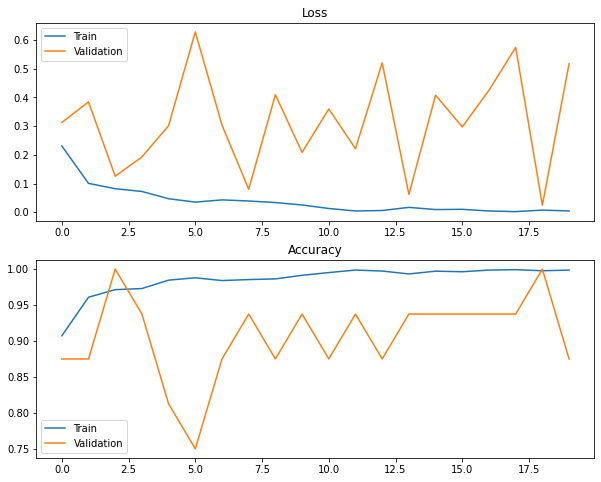

In [32]:
fig, ax = plt.subplots(2, 1, figsize=(10,8))

ax[0].plot(history.history["loss"], label="Train")
ax[0].plot(history.history["val_loss"], label="Validation")
ax[0].title.set_text("Loss")
ax[0].legend()

ax[1].plot(history.history["accuracy"], label="Train")
ax[1].plot(history.history["val_accuracy"], label="Validation")
ax[1].title.set_text("Accuracy")
ax[1].legend()

plt.show()

In [34]:
bin_acc = BinaryAccuracy()
recall = Recall()
precision = Precision()

for batch in test.as_numpy_iterator():
    X, y = batch
    yhat = model.predict(X)
    bin_acc.update_state(y, yhat)
    recall.update_state(y, yhat)
    precision.update_state(y, yhat)

print("Accuracy:", bin_acc.result().numpy(), "\nRecall:", recall.result().numpy(), "\nPrecision:", precision.result().numpy())

Accuracy: 0.7203125 
Recall: 0.9948718 
Precision: 0.6940966
